# Seamless copy in images using adapted gradients and Poisson image editing

This simple demo is illustrating how to use mapping estimation to adapt gradients from one source image to a target image, before reconstructing the image with Poisson reconstruction

In [4]:
import numpy as np
import PIL.Image
import pylab as pl

from poissonblending import blend 

In [5]:
img_mask = np.asarray(PIL.Image.open('./me_mask.png'))
img_mask = img_mask[:,:,:3] # remove alpha
img_source = np.asarray(PIL.Image.open('./me.png'))
img_source = img_source[:,:,:3] # remove alpha
img_target = np.asarray(PIL.Image.open('./target.png'))

3 images are loaded (mask, source and target). The mask image allows to define where the copy will happen in the target image

In [6]:
nbsample=500
off = (35,-15)


nbsample is the number of gradient samples using for estimation mapping. Off is a 2D vector that allows to fine tune the position of the mask in the target image

In [7]:
img_ret1 = blend(img_target, img_source, img_mask, offset=off)

(425, 320)


The first image is the direct result of Poisson Edition without graident adaptation (equivalent to [Perez 03])

In [8]:
img_ret3 = blend(img_target, img_source, img_mask, reg=5,eta=1, nbsubsample=nbsample,offset=off,adapt='linear')


(425, 320)
It.  |Loss        |Delta loss
--------------------------------
    0|5.175048e+05|0.000000e+00
    1|5.059943e+05|-2.224218e-02
    2|5.053751e+05|-1.223804e-03
    3|5.051724e+05|-4.010926e-04
    4|5.050756e+05|-1.915342e-04
    5|5.050153e+05|-1.195540e-04
    6|5.049736e+05|-8.248577e-05
    7|5.049439e+05|-5.890885e-05
    8|5.049207e+05|-4.591272e-05
    9|5.049020e+05|-3.691475e-05
   10|5.048868e+05|-3.009406e-05


We then adapt the gradient of source image with an assumption of Linear Mapping. The outer loop of the method performs 10 iterations of the BCD algorithm

In [10]:
img_ret4 = blend(img_target, img_source, img_mask, reg=5,eta=1, nbsubsample=nbsample,offset=off,adapt='kernel')

(425, 320)
It.  |Loss        |Delta loss
--------------------------------
    0|6.634898e+05|0.000000e+00
    1|6.596695e+05|-5.757882e-03
    2|6.591883e+05|-7.294428e-04
    3|6.590598e+05|-1.949246e-04
    4|6.590104e+05|-7.492455e-05
    5|6.589864e+05|-3.651745e-05
    6|6.589718e+05|-2.211140e-05
    7|6.589606e+05|-1.692653e-05
    8|6.589522e+05|-1.285532e-05
    9|6.589514e+05|-1.137140e-06


For comparison, we use a non-linear mapping to model the mapping, by using RBF kernel.

Then, the images are displayed

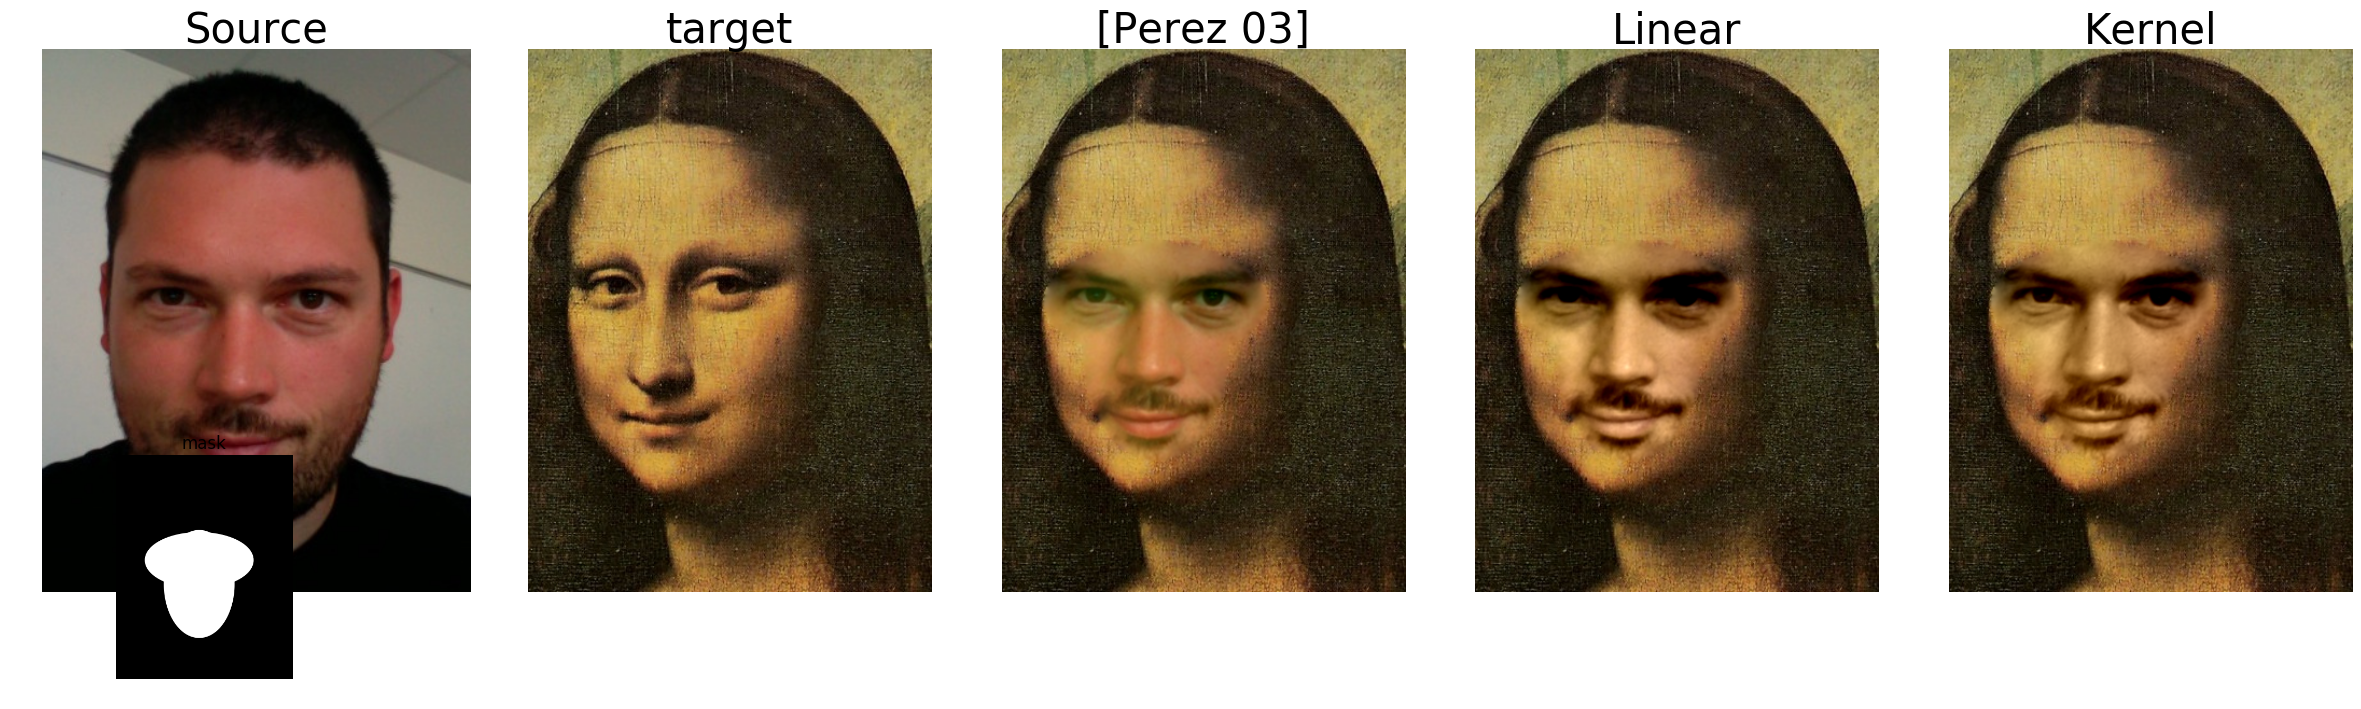

In [12]:
fs=30
f, axarr = pl.subplots(1, 5,figsize=(30,7))
newax = f.add_axes([0.15, 0, 0.32, 0.32], anchor='NW', zorder=1)
newax.imshow(img_mask)
newax.axis('off')
newax.set_title('mask')
axarr[0].imshow(img_source)
axarr[0].set_title('Source', fontsize=fs)
axarr[0].axis('off')
axarr[1].imshow(img_target)
axarr[1].set_title('target', fontsize=fs)
axarr[1].axis('off')
axarr[2].imshow(img_ret1)
axarr[2].set_title('[Perez 03]', fontsize=fs)
axarr[2].axis('off')
axarr[3].imshow(img_ret3)
axarr[3].set_title('Linear', fontsize=fs)
axarr[3].axis('off')
axarr[4].imshow(img_ret4)
axarr[4].set_title('Kernel', fontsize=fs)
axarr[4].axis('off')
pl.subplots_adjust(wspace=0.1)
pl.show()